In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# import rl

In [ ]:
# import gym
# from gym import spaces
# from gym.utils import seeding
# import numpy as np


# class HotterColder(gym.Env):
#     """Hotter Colder
#     The goal of hotter colder is to guess closer to a randomly selected number
#     After each step the agent receives an observation of:
#     0 - No guess yet submitted (only after reset)
#     1 - Guess is lower than the target
#     2 - Guess is equal to the target
#     3 - Guess is higher than the target
#     The rewards is calculated as:
#     (min(action, self.number) + self.range) / (max(action, self.number) + self.range)
#     Ideally an agent will be able to recognise the 'scent' of a higher reward and
#     increase the rate in which is guesses in that direction until the reward reaches
#     its maximum
#     """
#     def __init__(self):
#         self.range = 1000  # +/- value the randomly select number can be between
#         self.bounds = 2000  # Action space bounds

#         self.action_space = spaces.Box(low=np.array([-self.bounds]), high=np.array([self.bounds]))
#         self.observation_space = spaces.Discrete(4)

#         self.number = 0
#         self.guess_count = 0
#         self.guess_max = 200
#         self.observation = 0

#         self.seed()
#         self.reset()

#     def seed(self, seed=None):
#         self.np_random, seed = seeding.np_random(seed)
#         return [seed]

#     def step(self, action):
#         assert self.action_space.contains(action)

#         if action < self.number:
#             self.observation = 1

#         elif action == self.number:
#             self.observation = 2

#         elif action > self.number:
#             self.observation = 3

#         reward = ((min(action, self.number) + self.bounds) / (max(action, self.number) + self.bounds)) ** 2

#         self.guess_count += 1
#         done = self.guess_count >= self.guess_max

#         return self.observation, reward[0], done, {"number": self.number, "guesses": self.guess_count}

#     def reset(self):
#         self.number = self.np_random.uniform(-self.range, self.range)
#         self.guess_count = 0
#         self.observation = 0
#         return self.observation

In [ ]:
#  # examples/quickstart.py

# import numpy as np

# from tensorforce.agents import PPOAgent
# from tensorforce.execution import Runner
# from tensorforce.contrib.openai_gym import OpenAIGym

# # Create an OpenAIgym environment
# env = OpenAIGym('CartPole-v1', visualize=False)

# # Network as list of layers
# network_spec = [
#     dict(type='dense', size=32, activation='tanh'),
#     dict(type='dense', size=32, activation='tanh')
# ]

# agent = PPOAgent(
#     states_spec=env.states,
#     actions_spec=env.actions,
#     network_spec=network_spec,
#     batch_size=4096,
#     # BatchAgent
#     keep_last_timestep=True,
#     # PPOAgent
#     step_optimizer=dict(
#         type='adam',
#         learning_rate=1e-3
#     ),
#     optimization_steps=10,
#     # Model
#     scope='ppo',
#     discount=0.99,
#     # DistributionModel
#     distributions_spec=None,
#     entropy_regularization=0.01,
#     # PGModel
#     baseline_mode=None,
#     baseline=None,
#     baseline_optimizer=None,
#     gae_lambda=None,
#     # PGLRModel
#     likelihood_ratio_clipping=0.2,
#     summary_spec=None,
#     distributed_spec=None
# )

# # Create the runner
# runner = Runner(agent=agent, environment=env)


# # Callback function printing episode statistics
# def episode_finished(r):
#     print("Finished episode {ep} after {ts} timesteps (reward: {reward})".format(ep=r.episode, ts=r.episode_timestep,
#                                                                                  reward=r.episode_rewards[-1]))
#     return True


# # Start learning
# runner.run(episodes=3000, max_episode_timesteps=500, episode_finished=episode_finished)
# runner.close()

# # Print statistics
# print("Learning finished. Total episodes: {ep}. Average reward of last 100 episodes: {ar}.".format(
#     ep=runner.episode,
#     ar=np.mean(runner.episode_rewards[-100:]))
# )


In [ ]:
# print("Learning finished. Total episodes: {ep}. Average reward of last 100 episodes: {ar}.".format(
#     ep=runner.episode,
#     ar=np.mean(runner.episode_rewards[-100:]))
# )

In [ ]:
# from random import random

# import numpy

# from tensorforce import util, TensorForceError
# from tensorforce.environments import Environment


# class MinimalTest(Environment):

#     def __init__(self, specification):
#         """
#         Initializes a minimal test environment, which is used for the unit tests.
#         Given a specification of actions types and shapes, the environment states consist
#         of the same number of pairs (x, y). The (mean of) an action a gives the next state via (1-a, a),
#         and the 'correct' state is always (0, 1).
#         Args:
#             specification: Takes a list of (type, shape) pairs specifying the action structure of the environment.
#         """
#         self.specification = dict()
#         for action_type, shape in specification.items():
#             if action_type in ('bool', 'int', 'float', 'bounded'):
#                 if isinstance(shape, int):
#                     self.specification[action_type] = (shape,)
#                 else:
#                     self.specification[action_type] = tuple(shape)
#             else:
#                 raise TensorForceError('Invalid MinimalTest specification.')
#         self.single_state_action = (len(specification) == 1)

#     def __str__(self):
#         return 'MinimalTest'

#     def close(self):
#         pass

#     def reset(self):
#         self.state = {action_type: (1.0, 0.0) for action_type in self.specification}
#         if self.single_state_action:
#             return next(iter(self.state.values()))
#         else:
#             return dict(self.state)

#     def execute(self, actions):
#         if self.single_state_action:
#             actions = {next(iter(self.specification)): actions}

#         reward = 0.0
#         for action_type, shape in self.specification.items():
#             if action_type == 'bool' or action_type == 'int':
#                 correct = numpy.sum(actions[action_type])
#                 overall = util.prod(shape)
#                 self.state[action_type] = ((overall - correct) / overall, correct / overall)
#             elif action_type == 'float' or action_type == 'bounded':
#                 step = numpy.sum(actions[action_type]) / util.prod(shape)
#                 self.state[action_type] = max(self.state[action_type][0] - step, 0.0), min(self.state[action_type][1] + step, 1.0)
#             reward += max(min(self.state[action_type][1], 1.0), 0.0)

#         terminal = random() < 0.25
#         if self.single_state_action:
#             return next(iter(self.state.values())), terminal, reward
#         else:
#             reward = reward / len(self.specification)
#             return dict(self.state), terminal, reward

#     @property
#     def states(self):
#         if self.single_state_action:
#             return dict(shape=2, type='float')
#         else:
#             return {action_type: dict(shape=(2,), type='float') for action_type in self.specification}

#     @property
#     def actions(self):
#         if self.single_state_action:
#             action_type = next(iter(self.specification))
#             if action_type == 'int':
#                 return dict(type='int', num_actions=2)
#             elif action_type == 'bounded':
#                 return dict(type='float', min_value=-0.5, max_value=1.5)
#             else:
#                 return dict(type=action_type)
#         else:
#             actions = dict()
#             for action_type, shape in self.specification.items():
#                 if action_type == 'int':
#                     actions[action_type] = dict(type='int', shape=shape, num_actions=2)
#                 elif action_type == 'bounded':
#                     actions[action_type] = dict(type='float', shape=shape, min_value=-0.5, max_value=1.5)
#                 else:
#                     actions[action_type] = dict(type=action_type, shape=shape)
#             return actions

In [2]:
import math

import numpy
import scipy.sparse
import skimage.io
from tensorforce import util, TensorForceError
from tensorforce.environments import Environment

/home/santiago/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
class SNN(Environment): #TODO implement GPU for matrix computations
    
    def __init__(self, specification): #TODO check for proper specification
#         self.specification = dict()
#         for key, value in specification.items():
#             if key in ['environment', 'input_neurons', 'inter_neurons', 'output_neurons', 'connection_density', 'seed']:
#                 if (key == 'environment' and not isinstance(value, Environment)) or \
#                 (key in ['input_neurons', 'inter_neurons', 'output_neurons', 'seed'] and not isinstance(value, int)) or \
#                 (key == 'connection_density' and not isinstance(value, float)):
#                     raise TensorForceError('Invalid specification.')
#                 self.specification[key] = value
#             else:
#                 raise TensorForceError('Invalid specification.')
#         if set(specification.keys()) != set('environment', 'input_neurons', 'inter_neurons', 'output_neurons', 'train', 'max_history', 'lr'):
#             raise TensorForceError('Invalid SNN specification')
        self.specification = specification
        self.potential_matrix = numpy.zeros((self.specification['input_neurons'] + self.specification['inter_neurons'] + self.specification['output_neurons'],))
        self.weight_matrix = numpy.zeros((self.specification['inter_neurons'] + self.specification['output_neurons'], self.specification['input_neurons'] + self.specification['inter_neurons']))
        self.weight_mask = numpy.ones_like(self.weight_matrix, dtype=numpy.uint8)
        self.weight_mask[-self.specification['output_neurons']:, :self.specification['input_neurons']] = 0
        numpy.fill_diagonal(self.weight_mask[:self.specification['inter_neurons'], -self.specification['inter_neurons']:], 0)
        self.history_matrix = numpy.zeros((self.specification['inter_neurons'] + self.specification['output_neurons'], self.specification['max_history'], self.specification['input_neurons'] + self.specification['inter_neurons'] + 2))
        self.random_seed = None
        
    def __str__(self):
        return 'SNN'
    
    def interconnect(self, weight_density):
        sparse_matrix = scipy.sparse.random(self.weight_matrix.shape[0], self.weight_matrix.shape[1], density=weight_density, random_state=self.random_seed)
        sparse_matrix.data *= 2
        sparse_matrix.data -= 1
        self.weight_matrix = numpy.multiply(sparse_matrix.toarray(), self.weight_mask)
    
    def close(self):
        self.specification['environment'].close()
        
    def reset(self):
        self.next_input = self.specification['environment'].reset()
        self.potential_matrix[:] = 0
        if self.specification['train']:
            self.history_matrix[:, :, :] = 0
        return self.history_matrix
    
    def seed(self, seed):
        self.random_seed = seed
        return self.specification['environment'].seed(self.random_seed)
    
    def execute(self, actions):
        if self.specification['train']:
            self.weight_matrix = numpy.clip(numpy.multiply(numpy.add(self.weight_matrix, self.specification['lr'] * actions), self.weight_mask), -1, 1)
        self.potential_matrix[:self.specification['input_neurons']] = numpy.add(self.potential_matrix[:self.specification['input_neurons']], self.next_input)
        firing_matrix = numpy.vectorize(lambda x: x >= 1)(self.potential_matrix)
        for i in range(self.specification['inter_neurons'] + self.specification['output_neurons']):
            pos = self.specification['input_neurons'] + i
            deltas = numpy.multiply(firing_matrix[:-self.specification['output_neurons']], self.weight_matrix[i])
            if self.specification['train']:
                self.history_matrix[i, self.specification['max_history'] - 1, :] = numpy.concatenate([self.potential_matrix[pos:pos + 1], firing_matrix[pos:pos + 1], deltas])
            self.potential_matrix[pos] += numpy.sum(deltas)
        self.potential_matrix = numpy.clip(numpy.multiply(self.potential_matrix, numpy.invert(firing_matrix)), -1, 1)
        if self.specification['train']:
            self.history_matrix = numpy.roll(self.history_matrix, 1, axis=1)
        self.next_input, terminal, reward = self.specification['environment'].execute(firing_matrix[-self.specification['output_neurons']:])
        return self.history_matrix, terminal, reward
    
    @property
    def states(self):
        return {'shape': self.history_matrix.shape, 'type': 'float'}
    
    @property
    def actions(self):
        return {'shape': self.weight_matrix.shape, 'type': 'float', 'min_value': -1, 'max_value': 1}

In [4]:
class Test(Environment):
    
    def __init__(self):
        pass

    def __str__(self):
        return 'Test'

    def close(self):
        pass

    def reset(self):
        self.state = numpy.array([1, 1])
        return self.state

    def execute(self, actions):
        self.state = numpy.abs(numpy.add(self.state, actions))
        terminal = min(self.state) <= 0
        reward = self.state[0] ** self.state[1]
        return self.state, terminal, reward

    @property
    def states(self):
        return {'shape': self.state.shape, 'dtype': 'float'}

    @property
    def actions(self):
        return {'shape': self.state.shape, 'dtype': 'float', 'min_value': -1, 'max_value': 1}

In [ ]:
# test = Test()

In [ ]:
# test.actions

In [5]:
snn = SNN({'environment': Test(), 'input_neurons': 2, 'inter_neurons': 1020, 'output_neurons': 2, 'max_history': 16, 'train': False, 'lr': 0.001})

In [6]:
snn.seed(0)

In [7]:
snn.interconnect(0.01)

In [8]:
snn.weight_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.99143665,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# import numpy
# numpy.set_printoptions(threshold=numpy.nan)

In [ ]:
# img = snn.weight_matrix

In [9]:
%matplotlib inline

/home/santiago/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


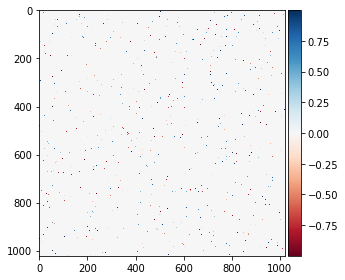

In [10]:
skimage.io.imshow(snn.weight_matrix)

In [ ]:
# from PIL import Image

In [ ]:
# img = Image.fromarray(snn.weight_mask)

In [ ]:
# img.show()

In [ ]:
# snn.weight_matrix

In [ ]:
# test = skimage.io.imread('/home/santiago/Pictures/412057.jpg')

In [ ]:
# skimage.io.imshow(test)

In [ ]:
# import pandas

In [ ]:
# pandas.DataFrame(data=snn.weight_matrix).to_csv('/home/santiago/Pictures/test.txt', sep='\t')

In [46]:
state = snn.reset()

In [ ]:
#snn.next_input = numpy.random.randint(2, size=(2,))

In [48]:
for i in range(1000):
    stuff = snn.execute(numpy.random.uniform(low=-1, high=1, size=snn.weight_matrix.shape))

/home/santiago/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


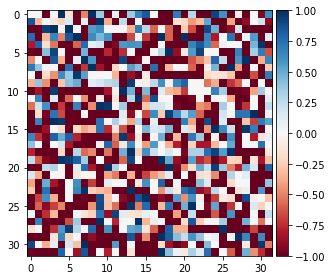

In [49]:
skimage.io.imshow(snn.potential_matrix.reshape((32, 32)))

In [50]:
snn.potential_matrix[-2:]

array([-0.74929059, -1.        ])

In [51]:
stuff

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
